In [13]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("activity_net.v1-1.json", "r") as fobj:
    data = json.load(fobj)["database"]

In [3]:
pcn = []
activity = []
for x in data:
    this_video = data[x]
    for nn in this_video["annotations"]:
        xx = np.array(this_video["annotations"][nn])
        pcn.extend(((xx[:, 1]-xx[:, 0]).flatten()).tolist())
        activity.extend([nn]*xx.shape[0])

In [5]:
act_dict = dict((el,[]) for el in list(set(activity)))

In [6]:
for x in act_dict:
    for idx, cc in enumerate(activity):
        if cc!=x:
            continue
        act_dict[x].append(pcn[idx])

In [8]:
for x in act_dict:
    act_dict[x] = np.array(act_dict[x]).mean()

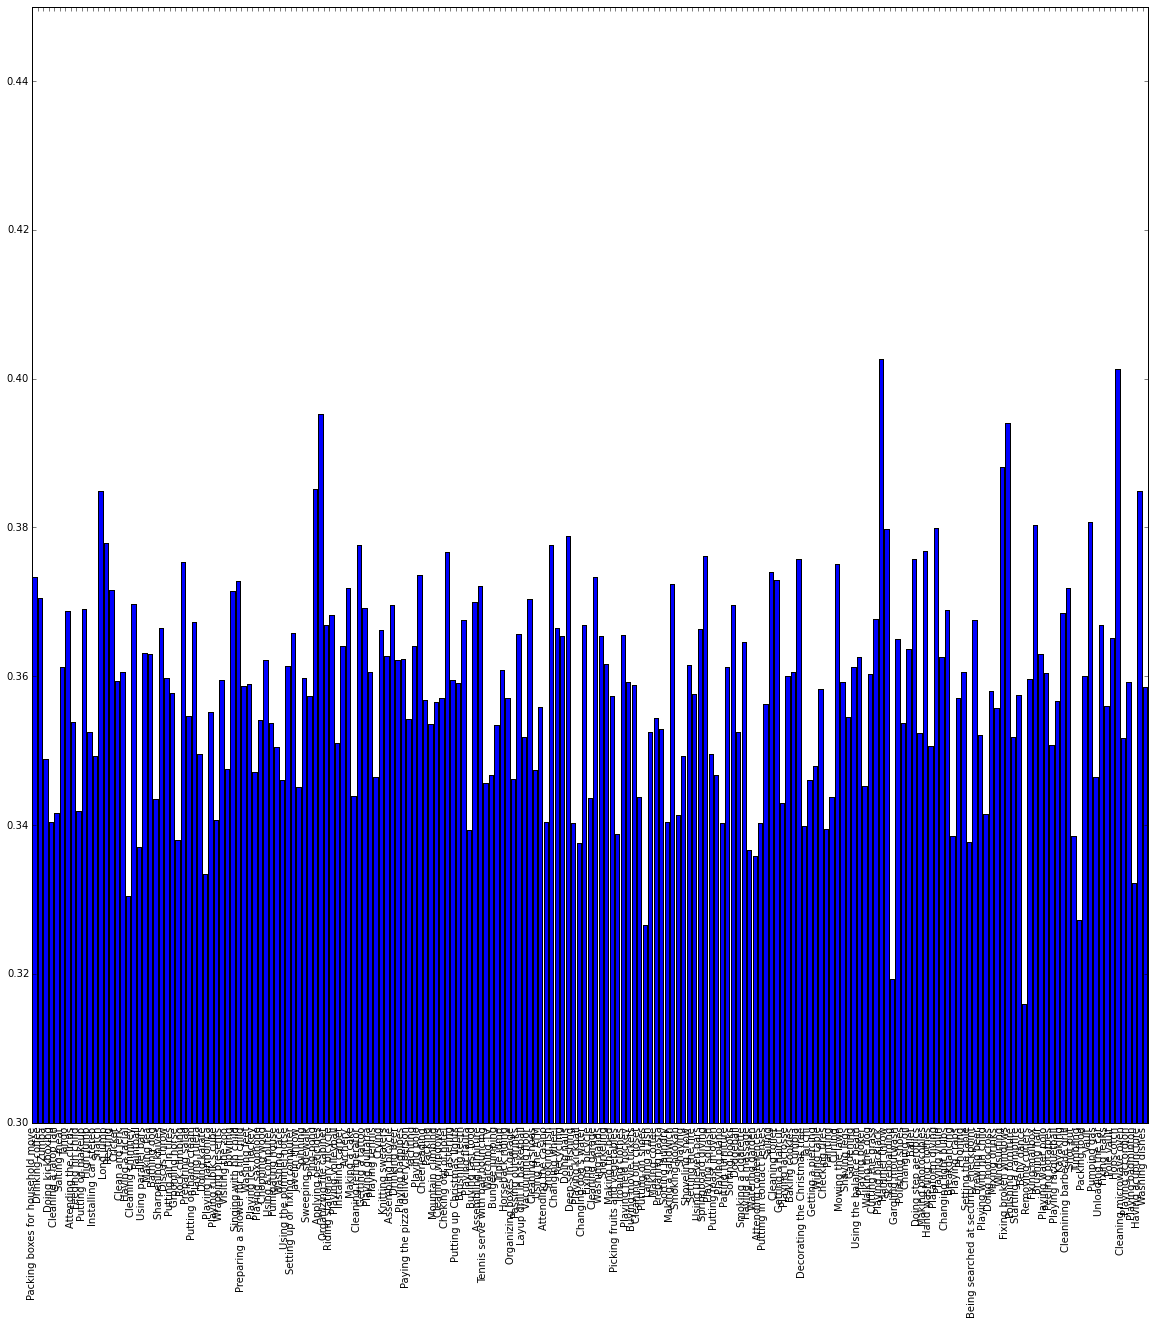

In [29]:
y = [act_dict[x] for x in act_dict]
x = [x for x in act_dict]

plt.figure(figsize=(20,20))
plt.bar(np.arange(len(x)), y)
plt.xlim((0, 203))
plt.ylim((0.3, 0.45))
plt.xticks(np.arange(len(x)), x, rotation="vertical")
plt.show()